In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from empiricaldist import Cdf, Pmf
from scipy import stats

In [5]:
df=pd.read_csv("../Pandas Dataset/olympic_athlete_events.csv")
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
df=df[:5000]

In [8]:
df.axes

[RangeIndex(start=0, stop=5000, step=1),
 Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
        'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
       dtype='object')]

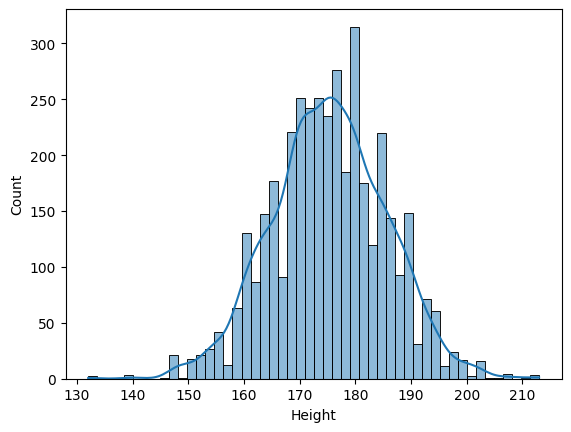

((array([-3.63568806, -3.40036853, -3.27067228, ...,  3.27067228,
          3.40036853,  3.63568806]),
  array([132., 132., 140., ...,  nan,  nan,  nan])),
 (nan, nan, nan))

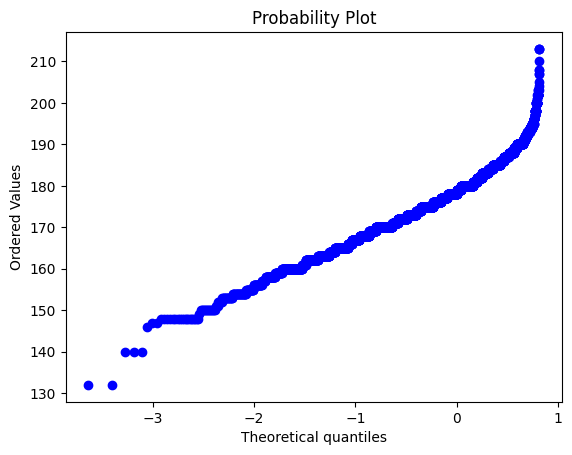

In [28]:
sns.histplot(df["Height"],kde=True)
plt.show()
stats.probplot(df["Height"],plot=plt)

In [29]:
df["Height"].skew()

-0.021283958911361908

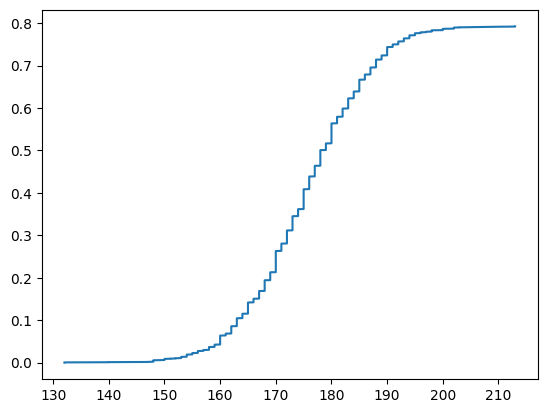

In [34]:
x=np.sort(df["Height"])
n=len(df["Height"])
y=np.arange(1,n+1)/n
plt.plot(x,y)

<Axes: xlabel='Height', ylabel='Proportion'>

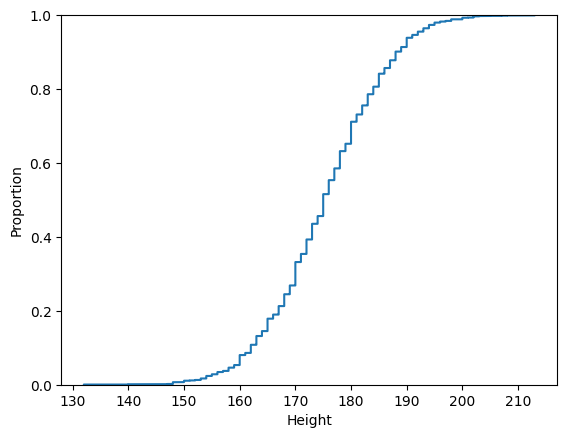

In [35]:
sns.ecdfplot(df["Height"])

## Probabilty of height equal or below 180cm

In [36]:
mean=np.mean(df["Height"])
std=np.std(df["Height"])

prob_180cm=stats.norm(loc=mean,scale=std).cdf(180)
prob_180cm

0.6769610435885458

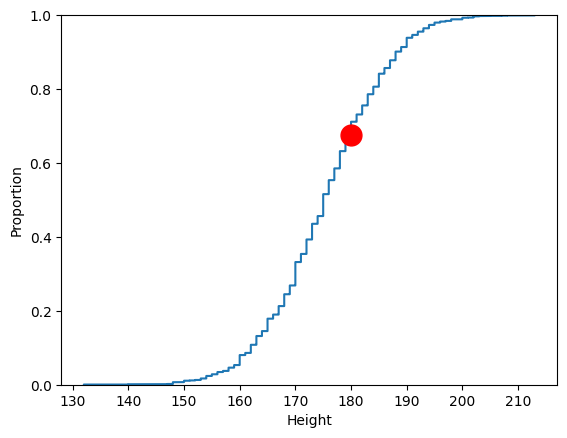

In [40]:
sns.ecdfplot(df["Height"])
plt.plot(180,0.6769610435885458,marker = 'o' , color = 'r' , markersize = 15)

In [81]:
df=pd.read_csv("../Pandas Dataset/supermarket_sales.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [47]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [57]:
df["Date"]=pd.to_datetime(df["Date"])
df["Time"]=pd.to_datetime(df["Time"])

C:\Users\isfar\AppData\Local\Temp\ipykernel_13256\2384983477.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Time"]=pd.to_datetime(df["Time"])


(array([19933.41666667, 19933.5       , 19933.58333333, 19933.66666667,
        19933.75      , 19933.83333333]),
 [Text(19933.416666666668, 0, '07-29 10'),
  Text(19933.5, 0, '07-29 12'),
  Text(19933.583333333332, 0, '07-29 14'),
  Text(19933.666666666668, 0, '07-29 16'),
  Text(19933.75, 0, '07-29 18'),
  Text(19933.833333333332, 0, '07-29 20')])

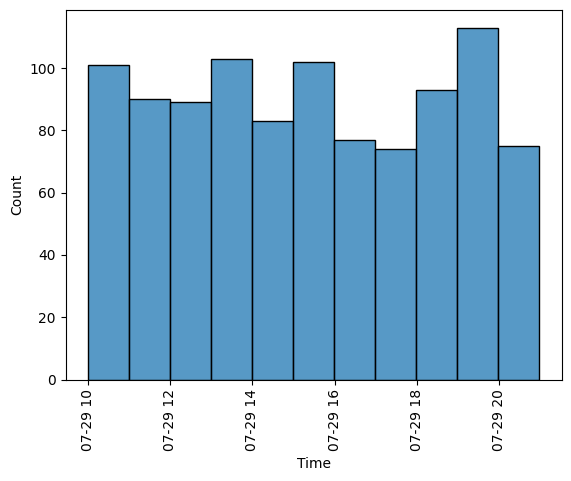

In [58]:
sns.histplot(df["Time"])
plt.xticks(rotation=90)

In [61]:
df["Unit price"].dtype

dtype('float64')

In [82]:
def gender_numaric(data):
    if(data=="Female"):
       return 0
    else:
        return 1
df["Gender"]=df["Gender"].apply(gender_numaric)
df["Gender"].astype(int)
df["Gender"].value_counts()

Gender
0    501
1    499
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='Unit price'>

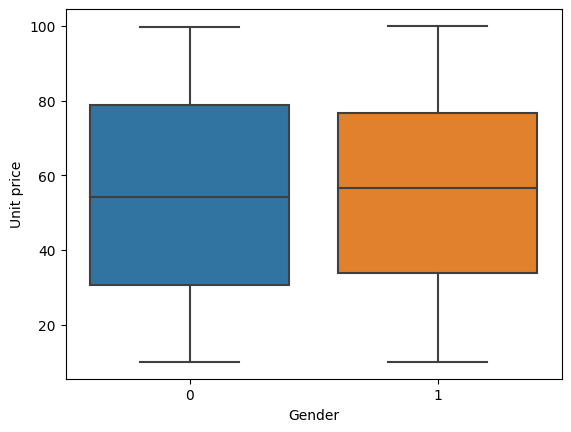

In [83]:
sns.boxplot(y=df["Unit price"],x=df["Gender"])

<Axes: xlabel='Rating', ylabel='Count'>

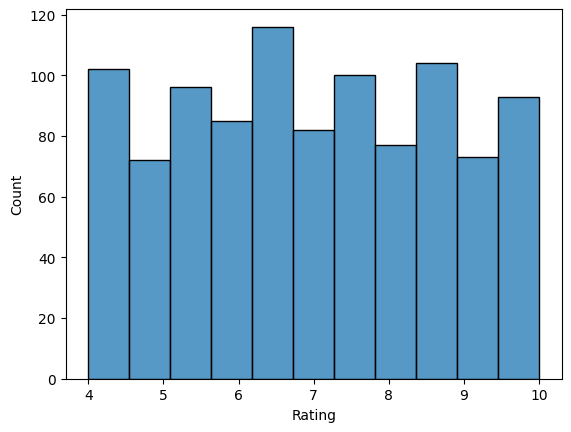

In [85]:
sns.histplot(df["Rating"])

In [86]:
df=pd.read_csv("../Pandas Dataset/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<Axes: xlabel='volatile acidity', ylabel='Count'>

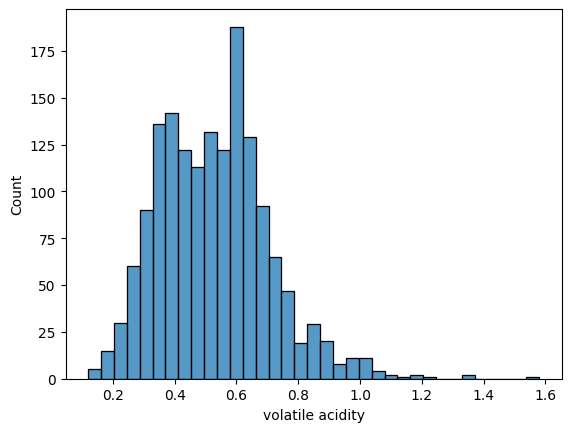

In [87]:
sns.histplot(df["volatile acidity"])

# Way 1 to fix

<Axes: xlabel='volatile acidity', ylabel='Count'>

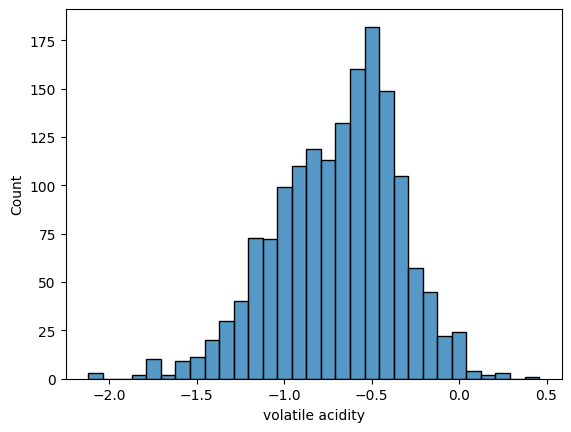

In [88]:
x=np.log(df["volatile acidity"])
sns.histplot(x)

In [91]:
x.skew()

-0.4343845902251234

# Trying another way since way 1 didnt work

<Axes: xlabel='volatile acidity', ylabel='Count'>

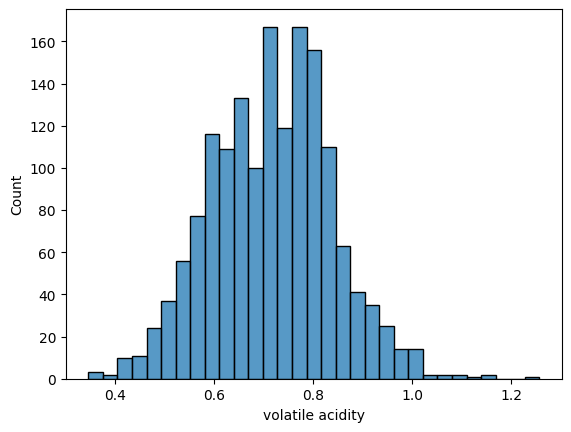

In [89]:
x1=np.sqrt(df["volatile acidity"])
sns.histplot(x1)


In [92]:
x1.skew()

0.10835527504529936

## yeojohnson method

<Axes: ylabel='Count'>

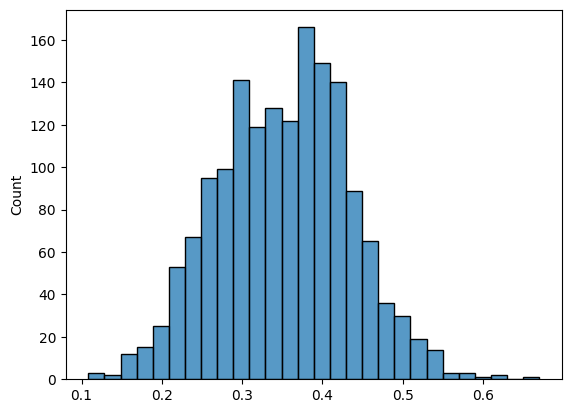

In [90]:
x2,_=stats.yeojohnson(df["volatile acidity"])
sns.histplot(x2)

In [94]:
skew(x2)

0.0030957521033038535